## MAJOR PROJECT

**Problem Statement :** Predict the costs of used cars given in the data collected from various sources and distributed across various locations in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
#Loading the dataset
df_train = pd.read_csv('Data_Train.csv')

In [3]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


## Data Cleaning and Preprocessing


In [5]:
df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

* Dropping all the rows with null values

In [6]:
df_train.dropna()
df_train.dropna(subset=['Seats'],inplace=True)
df_train.dropna(subset=['Mileage'],inplace=True)
df_train=df_train.drop(['Location'],axis=1)
df_train=df_train.reset_index()
df_train=df_train.drop(['index'],axis=1)
df_train.isnull().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
#Remove noisy data

df_train['Mileage']=df_train['Mileage'].astype(str)
df_train['Engine']=df_train['Engine'].astype(str)
df_train['Power']=df_train['Power'].astype(str)
df_train['Mileage']=df_train['Mileage'].str.replace('kmpl','')
df_train['Mileage']=df_train['Mileage'].str.replace('km/kg','')
df_train['Engine']=df_train['Engine'].str.replace('CC','')
df_train['Power']=df_train['Power'].str.replace('bhp','')

df_train

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
5972,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
5973,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [8]:
#Split the cars data according to their manufacture year

df_train['car_type']='New'
df_train['car_type']=np.where((df_train.Year<2011),'old',df_train.car_type)
df_train['car_type']=np.where((df_train.Year>=2011),'modern',df_train.car_type)
df_train['car_type']=np.where((df_train.Year>2015),'new',df_train.car_type)

df_train

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_type
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,old
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,modern
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,modern
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,modern
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,modern
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75,modern
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00,modern
5972,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90,modern
5973,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65,modern


In [9]:
#Dropping the error null values that have been entered

df_train = df_train.drop([4446,76,4413,4864,4863])

In [10]:
df_train['Power'] = df_train['Power'].astype(str)
drop=df_train.loc[df_train.Power.str.contains('null ')].index
df_train.drop(drop,inplace=True)
df_train = df_train[df_train['Kilometers_Driven']<150000]
df_train = df_train[df_train['Kilometers_Driven']>=10000]
df_train = df_train[df_train['Mileage']!=0]

In [11]:
df_train['Mileage']=pd.to_numeric(df_train['Mileage'],downcast='float')
df_train['Engine']=pd.to_numeric(df_train['Engine'],downcast='float')
df_train['Power']=pd.to_numeric(df_train['Power'],downcast='float')
null_values=df_train[df_train['Mileage']==0].index
df_train.drop(null_values,inplace=True)

In [12]:
#Converting the cars' data according to the kilometers driven and storing it in condition

df_train['condition']='excellent'
df_train['condition']=np.where((df_train.Kilometers_Driven<20000),'excellent',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>=20000)&(df_train.car_type=='old'),'good',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>60000)&(df_train.car_type=='old'),'good',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>80000)&(df_train.car_type=='old'),'bad',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>=20000)&(df_train.car_type=='like new'),'good',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>60000)&(df_train.car_type=='like_new'),'fair',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>=20000)&(df_train.car_type=='new'),'excellent',df_train.condition)
df_train['condition']=np.where((df_train.Kilometers_Driven>100000),'bad',df_train.condition)

In [13]:
#Converting the cars' data according to the no of oeners to the car

df_train['condition']=np.where((df_train.condition=='excellent')&(df_train.Owner_Type=='First'),'excellent',df_train.condition)
df_train['condition']=np.where((df_train.condition=='excellent')&(df_train.Owner_Type=='Second'),'good',df_train.condition)
df_train['condition']=np.where((df_train.condition=='good')&(df_train.Owner_Type=='First'),'good',df_train.condition)
df_train['condition']=np.where((df_train.condition=='good')&(df_train.Owner_Type=='Second'),'fair',df_train.condition)
df_train['condition']=np.where((df_train.condition=='fair')&(df_train.Owner_Type=='First'),'fair',df_train.condition)
df_train['condition']=np.where((df_train.condition=='fair')&(df_train.Owner_Type=='Second'),'fair',df_train.condition)
df_train['condition']=np.where((df_train.condition=='bad')&(df_train.Owner_Type=='First'),'bad',df_train.condition)
df_train['condition']=np.where((df_train.condition=='bad')&(df_train.Owner_Type=='Second'),'bad',df_train.condition)
df_train['condition']=np.where((df_train.condition=='excellent')&(df_train.Engine<2000),'good',df_train.condition)
df_train['condition']=np.where((df_train.condition=='good')&(df_train.Engine<1000),'fair',df_train.condition)
df_train['condition']=np.where((df_train.condition=='fair')&(df_train.Power>290),'excellent',df_train.condition)


## Exploratory Data Analysis and Vizualiization

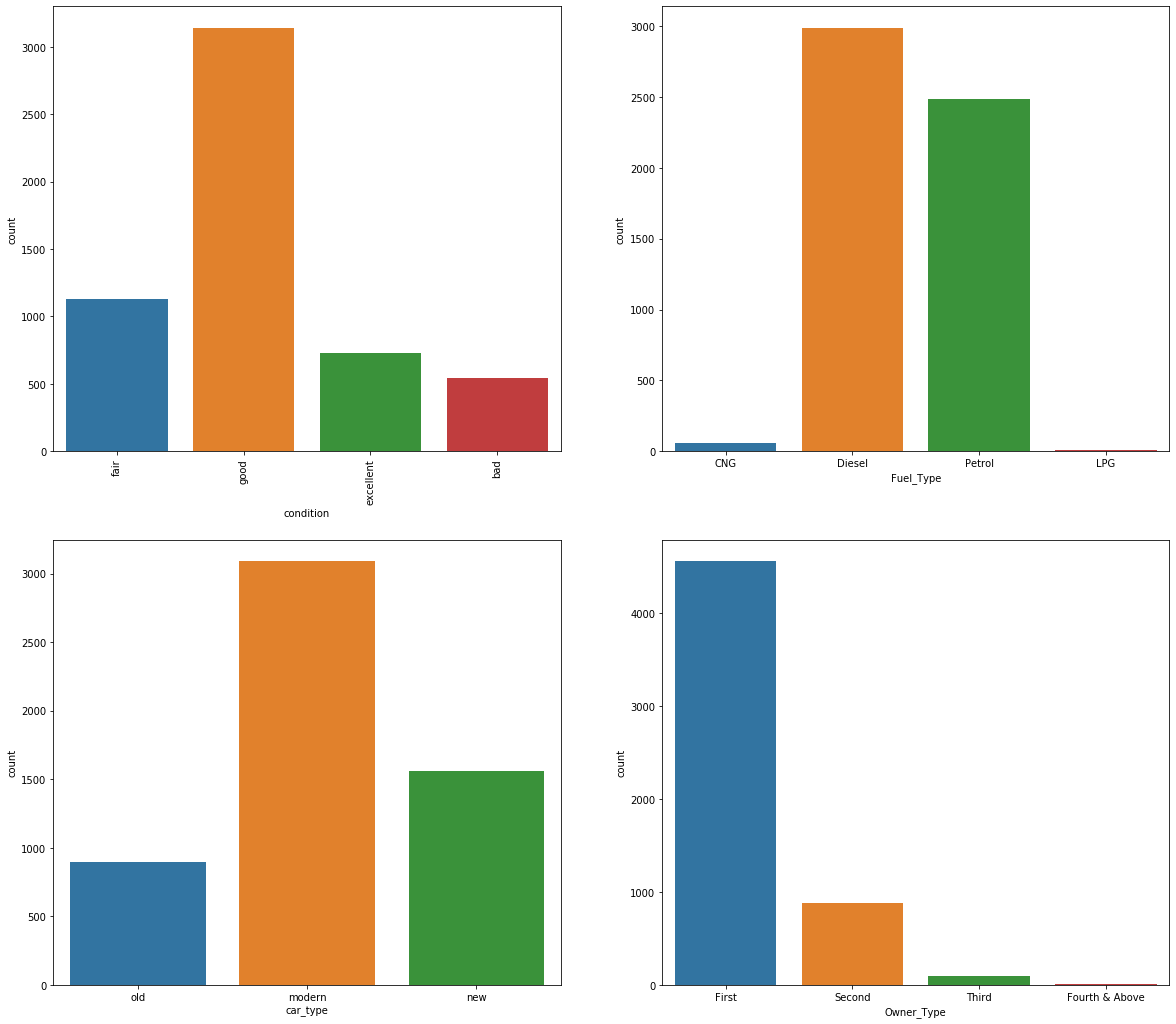

In [14]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='condition', data=df_train)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)

fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=df_train)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)

fig.add_subplot(2,2,3)
g3 = sns.countplot(x='car_type', data=df_train)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)

fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=df_train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)

plt.show()

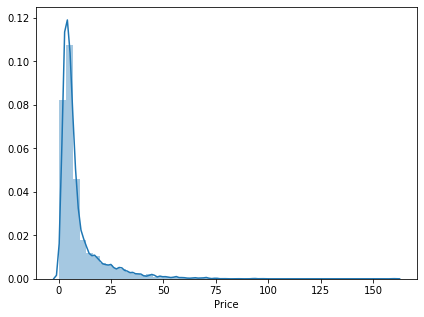

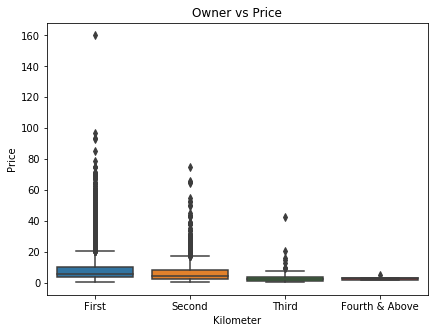

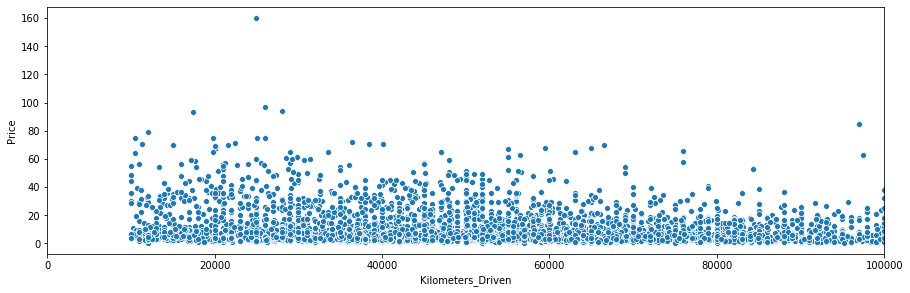

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train['Price'])

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Owner_Type', y='Price', data=df_train)
ax1.set_title('Owner vs Price')

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax2 = fig.add_subplot(2,1,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=df_train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

plt.show()

In [16]:
df_train

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_type,condition
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.600000,998.0,58.160000,5.0,1.75,old,fair
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.199997,5.0,12.50,modern,good
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.200001,1199.0,88.699997,5.0,4.50,modern,good
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.760002,7.0,6.00,modern,good
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.800003,5.0,17.74,modern,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,4.75,modern,good
5971,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,4.00,modern,good
5972,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,2.90,modern,fair
5973,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,2.65,modern,fair


## Training the model

In [17]:
#Identifying object type of data from the data set
s=df_train.dtypes=='object'
obj_col=list(s[s].index)
obj_col=obj_col[1:]
obj_col

['Fuel_Type', 'Transmission', 'Owner_Type', 'car_type', 'condition']

In [18]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df_train.copy()
for i in obj_col:
    df[i]=le.fit_transform(df_train[i])

In [19]:
X=df[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]
y=df[['Price']]
from sklearn.model_selection import train_test_split as ttt
X_train,X_test,y_train,y_test=ttt(X,y,train_size=0.7,random_state=100)

**Random Forest Regression**

In [20]:
from sklearn.ensemble import RandomForestRegressor
cls=RandomForestRegressor(random_state=100)
cls.fit(X_train,y_train)

C:\Users\Sai Pavan Reddy V\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sai Pavan Reddy V\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [21]:
y_pred=cls.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error  -->',rmse)
print('Mean Absolute Error -->',mae)
print('R Square Score      -->',r2)

Mean Squared Error  --> 17.972754930783527
Mean Absolute Error --> 1.7559514002233485
R Square Score      --> 0.8580436425938218


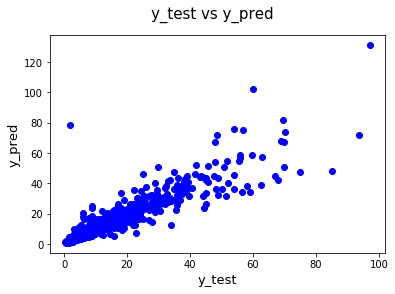

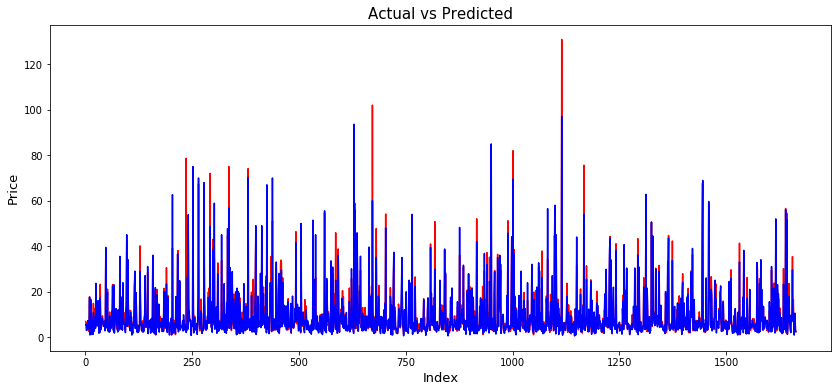

In [22]:
fig = plt.figure()
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=15)               
plt.xlabel('y_test', fontsize=13)                          
plt.ylabel('y_pred', fontsize=13)                          

c=[i for i in range(1,1664,1)]
plt.figure(figsize=(14,6))
plt.plot(c,y_pred,color='r')
plt.plot(c,y_test,color='b')
plt.title('Actual vs Predicted',fontsize=15)
plt.xlabel('Index',fontsize=13)
plt.ylabel('Price',fontsize=13)  

plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
cls=LinearRegression()
cls.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_train_predict=cls.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)
print('RMSE is {}',format(rmse))
print('R2 score is {}',format(r2))
print()
y_test_predict=cls.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2=r2_score(y_test,y_test_predict)
print('RMSE is {}',format(rmse))
print('R2 score is {}',format(r2))

RMSE is {} 5.931932647756501
R2 score is {} 0.6935012686443482

RMSE is {} 6.099190597532024
R2 score is {} 0.7061778010914925


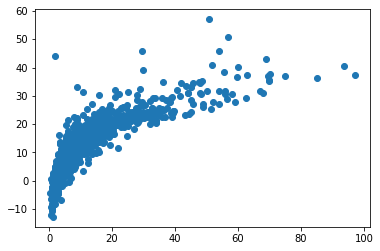

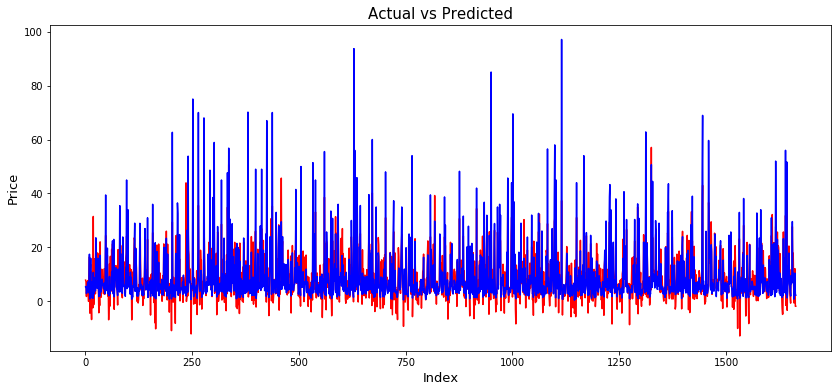

In [25]:
plt.scatter(y_test,y_test_predict)

c=[i for i in range(1,1664,1)]
plt.figure(figsize=(14,6))
plt.plot(c,y_test_predict,color='r')
plt.plot(c,y_test,color='b')
plt.title('Actual vs Predicted',fontsize=15)
plt.xlabel('Index',fontsize=13)
plt.ylabel('Price',fontsize=13)  
plt.show()

* **Conclusion:** Random Forrest is the best model for the data set

### Analyzing TheTest Data

**Data Cleaning and Preprocessing**

In [26]:
df_test=pd.read_csv('Data_Test.csv')
df_test.drop(df_test.columns[0], axis=1, inplace=True)

In [27]:
df_test.drop(columns=["New_Price"], axis=1, inplace=True)
df_test.isnull().sum()


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [28]:
df_test.drop(['Location'],axis=1)
df_test=df_test.reset_index()
df_test=df_test.drop(['index'],axis=1)
df_test=df_test.dropna()
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [29]:
df_test['Mileage']=df_test['Mileage'].astype(str)
df_test['Engine']=df_test['Engine'].astype(str)
df_test['Power']=df_test['Power'].astype(str)
df_test['Mileage']=df_test['Mileage'].str.replace('kmpl','')
df_test['Mileage']=df_test['Mileage'].str.replace('km/kg','')
df_test['Engine']=df_test['Engine'].str.replace('CC','')
df_test['Power']=df_test['Power'].str.replace('bhp','')


In [30]:
df_test['Power']=df_test['Power'].astype(str)
drop=df_test.loc[df_test.Power.str.contains('null ')].index
#drop1=df_test.loc[df_test.Power.str.contains('NaN ')].index
df_test.drop(drop,inplace=True)
#df_test.drop(drop1,inplace=True)
df_test=df_test[df_test['Kilometers_Driven']<150000]
df_test=df_test[df_test['Kilometers_Driven']>=10000]
df_test=df_test[df_test['Mileage']!=0]

In [31]:
df_test['Mileage']=pd.to_numeric(df_test['Mileage'],downcast='float')
df_test['Engine']=pd.to_numeric(df_test['Engine'],downcast='float')
df_test['Power']=pd.to_numeric(df_test['Power'],downcast='float')
null_values=df_test[df_test['Mileage']==0].index
df_test.drop(null_values,inplace=True)


In [32]:
df_test=df_test.dropna(how='any',subset=['Mileage','Engine','Power'])

In [33]:
#selecting col with object data type
q=df_test.dtypes=='object'
cols_obj=list(q[q].index)
cols_obj=cols_obj[2:]
cols_obj

['Fuel_Type', 'Transmission', 'Owner_Type']

In [34]:
dt=df_test.copy()
for i in cols_obj:
    dt[i]=le.fit_transform(df_test[i])

In [35]:
test=dt[['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]

In [36]:
test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2014,40929,0,1,0,32.259998,998.0,58.200001,4.0
1,2013,54493,3,1,2,24.700001,796.0,47.299999,5.0
2,2017,34000,1,1,0,13.680000,2393.0,147.800003,7.0
4,2014,29000,3,1,0,18.500000,1197.0,82.849998,5.0
5,2016,85609,1,1,2,16.000000,2179.0,140.000000,7.0


In [37]:
np.where(np.isnan(test))

(array([], dtype=int64), array([], dtype=int64))

In [38]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

**Predicting the Price of the used cars**

* Implementing RandomForest using scikit

In [39]:
from sklearn.ensemble import RandomForestRegressor
regr_test=RandomForestRegressor(random_state=100)
regr_test.fit(X,y)

C:\Users\Sai Pavan Reddy V\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sai Pavan Reddy V\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [40]:
ytest_pred=regr_test.predict(test)

In [41]:
df_test['Price']=ytest_pred

### The Result of the used cars

In [42]:
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.259998,998.0,58.200001,4.0,3.290
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.700001,796.0,47.299999,5.0,2.271
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.680000,2393.0,147.800003,7.0,17.505
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.500000,1197.0,82.849998,5.0,4.423
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.000000,2179.0,140.000000,7.0,12.820
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540001,1598.0,103.599998,5.0,3.590
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.209999,1197.0,103.599998,5.0,6.878
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080000,1461.0,63.099998,5.0,3.600
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200001,1197.0,103.599998,5.0,4.589
